In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns = ['index','TV','Radio','Newspaper','Sales']

In [4]:
df = df[['TV','Radio','Newspaper','Sales']]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

С долларами не хочется работать, поэтому для практичности переведем данные в рубли

In [6]:
for i in df.columns:
    df[i] = df[i] * 94.15
df

/var/folders/x0/kdd99nqj78vcbmjb6lq55_tm0000gn/T/ipykernel_6857/2237595022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i] * 94.15


,TV,Radio,Newspaper,Sales
0,21663.915,3558.870,6515.180,2080.715
1,4189.675,3700.095,4246.165,979.160
2,1619.380,4321.485,6524.595,875.595
3,14263.725,3888.395,5507.775,1741.775
4,17022.320,1016.820,5498.360,1214.535
...,...,...,...,...
195,3596.530,348.355,1299.270,715.540
196,8868.930,461.335,762.615,913.255
197,16664.550,875.595,602.560,1205.120
198,26700.940,3954.300,6232.730,2400.825


Также меня, как маркетолога, немного насторожил объем продаж, с точки зрения реализма и окупаемости рекламных вложений. Посчитаем коэффициент ROI для телевидения например

In [7]:
(df.Sales.sum() - df.TV.sum()) * 100 / df.TV.sum()

-90.46364146420254

Окупаемости нет, по всему датасету ее тоже не будет, поэтому умножим данные на 100, чтобы получить положительную окупаемость :)

In [8]:
df['Sales'] = df['Sales'] * 100

/var/folders/x0/kdd99nqj78vcbmjb6lq55_tm0000gn/T/ipykernel_6857/30442451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Sales'] * 100


In [9]:
(df.Sales.sum() - df.TV.sum()) * 100 / df.TV.sum()

853.6358535797473

Переобозначим столбцы, чтобы удобнее было работать

In [10]:
df.columns = ['YD','TG','VK','Sales']
df

,YD,TG,VK,Sales
0,21663.915,3558.870,6515.180,208071.5
1,4189.675,3700.095,4246.165,97916.0
2,1619.380,4321.485,6524.595,87559.5
3,14263.725,3888.395,5507.775,174177.5
4,17022.320,1016.820,5498.360,121453.5
...,...,...,...,...
195,3596.530,348.355,1299.270,71554.0
196,8868.930,461.335,762.615,91325.5
197,16664.550,875.595,602.560,120512.0
198,26700.940,3954.300,6232.730,240082.5


Немного расширим датасет, добавив в него парочку маркетинговых категорий, данные будут случайные, поэтому качество модели на старте, это не улучшит. Возьмем средние показатели CPL в районе 600-1000 рублей (что релевантно для рыночных цен в текущих условиях)

In [11]:
cpl_YD = []
cpl_TG = []
cpl_VK = []

for i in range(len(df['YD'])):
    if 100 <= list(df['YD'])[i] <= 600:
        cpl_YD.append(np.random.randint(list(df['YD'])[i]-2,list(df['YD'])[i]))
    elif list(df['YD'])[i] < 100:
        cpl_YD.append(0)
    elif list(df['YD'])[i] > 600:
        cpl_YD.append(np.random.randint(601, 1000))
        
for i in range(len(df['TG'])):
    if 100 <= list(df['TG'])[i] <= 400:
        cpl_TG.append(np.random.randint(list(df['TG'])[i]-2, list(df['TG'])[i]))
    elif list(df['TG'])[i] < 100:
        cpl_TG.append(0)
    elif list(df['TG'])[i] > 400:
        cpl_TG.append(np.random.randint(401, 600))
        
for i in range(len(df['VK'])):
    if 100 <= list(df['VK'])[i] <= 250:
        cpl_VK.append(np.random.randint(list(df['VK'])[i]-2, list(df['VK'])[i]))
    elif list(df['VK'])[i] < 100:
        cpl_VK.append(0)
    elif list(df['VK'])[i] > 250:
        cpl_VK.append(np.random.randint(251, 500))


In [12]:
df['cpl_YD'] = cpl_YD
df['cpl_TG'] = cpl_TG
df['cpl_VK'] = cpl_VK
df

,YD,TG,VK,Sales,cpl_YD,cpl_TG,cpl_VK
0,21663.915,3558.870,6515.180,208071.5,608,481,470
1,4189.675,3700.095,4246.165,97916.0,630,422,379
2,1619.380,4321.485,6524.595,87559.5,902,459,337
3,14263.725,3888.395,5507.775,174177.5,978,440,388
4,17022.320,1016.820,5498.360,121453.5,681,595,493
...,...,...,...,...,...,...,...
195,3596.530,348.355,1299.270,71554.0,763,346,495
196,8868.930,461.335,762.615,91325.5,798,557,456
197,16664.550,875.595,602.560,120512.0,951,551,452
198,26700.940,3954.300,6232.730,240082.5,744,507,397


In [13]:
df.columns

Index(['YD', 'TG', 'VK', 'Sales', 'cpl_YD', 'cpl_TG', 'cpl_VK'], dtype='object')

In [14]:
df.columns

Index(['YD', 'TG', 'VK', 'Sales', 'cpl_YD', 'cpl_TG', 'cpl_VK'], dtype='object')

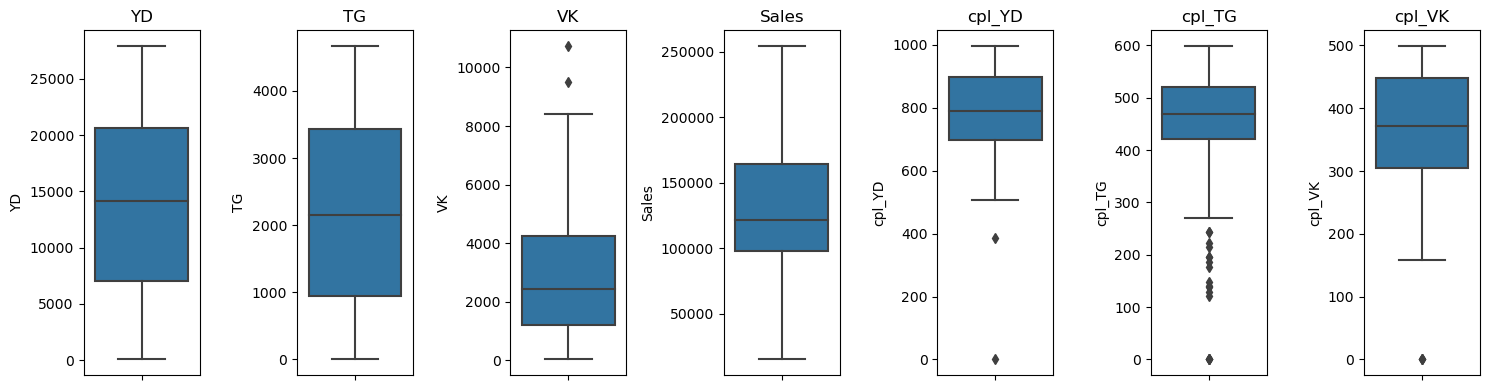

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 7, figsize=(15, 4))

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col],ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [16]:
df.loc[df['cpl_YD'] < 450]

,YD,TG,VK,Sales,cpl_YD,cpl_TG,cpl_VK
130,65.905,3728.34,819.105,15064.0,0,522,481
155,386.015,1092.14,536.655,30128.0,385,470,431


In [17]:
df.loc[df['cpl_TG'] < 250]

,YD,TG,VK,Sales,cpl_YD,cpl_TG,cpl_VK
8,809.690,197.715,94.150,45192.0,601,196,0
9,18811.170,244.790,1995.980,99799.0,691,243,367
32,9151.380,141.225,2824.500,90384.0,827,140,320
34,9010.155,131.810,696.710,89442.5,927,129,341
60,5037.025,188.300,2014.810,76261.5,642,186,255
76,2589.125,150.640,1948.905,64963.5,873,148,395
91,2692.690,141.225,3106.950,68729.5,981,139,369
107,8511.160,28.245,2184.280,81910.5,772,0,341
108,1233.365,37.660,2410.240,49899.5,703,0,278
117,7193.060,75.320,1393.420,88501.0,903,0,406


In [18]:
df.loc[df['VK'] > 8000]

,YD,TG,VK,Sales,cpl_YD,cpl_TG,cpl_VK
16,6383.370,3445.890,10733.100,117687.5,722,514,287
75,1591.135,4114.355,8417.010,81910.5,636,475,265
101,27906.060,3417.645,9499.735,224077.0,737,417,470


In [13]:
#import math

#df['leads_YD'] = df.apply(lambda row: math.floor(row['YD'] / row['cpl_YD']), axis=1)
#df['leads_TG'] = df.apply(lambda row: math.floor(row['TG'] / row['cpl_TG']), axis=1)
#df['leads_VK'] = df.apply(lambda row: math.floor(row['VK'] / row['cpl_VK']), axis=1)

<AxesSubplot:>

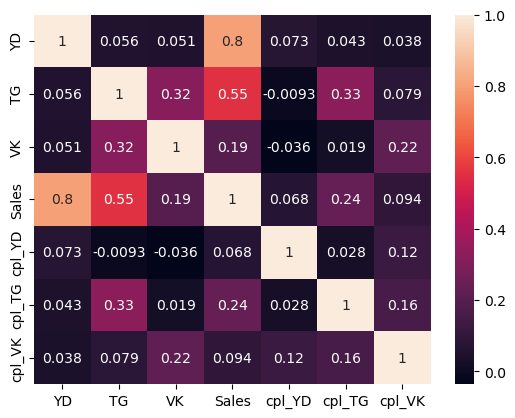

In [14]:
import seaborn as sns
sns.heatmap(df.corr('spearman'), annot = True)

In [30]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif["Variable"] = df.columns
#vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#vif

Построим первую модель линейной регрессии

In [16]:
y = df['Sales']
X = df.drop(['Sales'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn. metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.33, random_state=42)

model = LinearRegression()
reg = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print('R2:' + str(r2_score(test_y,y_pred)))
print('MAE:' + str(mae(test_y,y_pred)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred))))

R2:0.8571553524380382
MAE:14061.37099698831
RMSE:18077.468008542302


Добавим полиномиальные переменные

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_1 = PolynomialFeatures(2)
poly_features = poly_1.fit_transform(df.drop(['Sales'], axis=1))

# Преобразование в новый датафрейм с полиномиальными признаками
poly_df = pd.DataFrame(poly_features, columns=poly_1.get_feature_names_out(df.columns.drop(['Sales'])))
poly_df

,1,YD,TG,VK,cpl_YD,cpl_TG,cpl_VK,YD^2,YD TG,YD VK,...,VK^2,VK cpl_YD,VK cpl_TG,VK cpl_VK,cpl_YD^2,cpl_YD cpl_TG,cpl_YD cpl_VK,cpl_TG^2,cpl_TG cpl_VK,cpl_VK^2
0,1.0,21663.915,3558.870,6515.180,810.0,457.0,443.0,4.693252e+08,7.709906e+07,1.411443e+08,...,4.244757e+07,5277295.800,2977437.260,2886224.740,656100.0,370170.0,358830.0,208849.0,202451.0,196249.0
1,1.0,4189.675,3700.095,4246.165,780.0,564.0,431.0,1.755338e+07,1.550220e+07,1.779005e+07,...,1.802992e+07,3312008.700,2394837.060,1830097.115,608400.0,439920.0,336180.0,318096.0,243084.0,185761.0
2,1.0,1619.380,4321.485,6524.595,747.0,474.0,376.0,2.622392e+06,6.998126e+06,1.056580e+07,...,4.257034e+07,4873872.465,3092658.030,2453247.720,558009.0,354078.0,280872.0,224676.0,178224.0,141376.0
3,1.0,14263.725,3888.395,5507.775,783.0,453.0,437.0,2.034539e+08,5.546300e+07,7.856139e+07,...,3.033559e+07,4312587.825,2495022.075,2406897.675,613089.0,354699.0,342171.0,205209.0,197961.0,190969.0
4,1.0,17022.320,1016.820,5498.360,687.0,451.0,402.0,2.897594e+08,1.730864e+07,9.359484e+07,...,3.023196e+07,3777373.320,2479760.360,2210340.720,471969.0,309837.0,276174.0,203401.0,181302.0,161604.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,3596.530,348.355,1299.270,855.0,125.0,338.0,1.293503e+07,1.252869e+06,4.672864e+06,...,1.688103e+06,1110875.850,162408.750,439153.260,731025.0,106875.0,288990.0,15625.0,42250.0,114244.0
196,1.0,8868.930,461.335,762.615,842.0,409.0,419.0,7.865792e+07,4.091548e+06,6.763579e+06,...,5.815816e+05,642121.830,311909.535,319535.685,708964.0,344378.0,352798.0,167281.0,171371.0,175561.0
197,1.0,16664.550,875.595,602.560,684.0,548.0,266.0,2.777072e+08,1.459140e+07,1.004139e+07,...,3.630786e+05,412151.040,330202.880,160280.960,467856.0,374832.0,181944.0,300304.0,145768.0,70756.0
198,1.0,26700.940,3954.300,6232.730,752.0,465.0,367.0,7.129402e+08,1.055835e+08,1.664197e+08,...,3.884692e+07,4687012.960,2898219.450,2287411.910,565504.0,349680.0,275984.0,216225.0,170655.0,134689.0


In [45]:
train_X_p, test_X_p = train_test_split(poly_df, test_size=0.33, random_state=42)

reg_p = model.fit(train_X_p, train_y)
y_pred_p = reg_p.predict(test_X_p)
print('R2:' + str(r2_score(test_y,y_pred_p)))
print('MAE:' + str(mae(test_y,y_pred_p)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_p))))

R2:0.9567678823705071
MAE:7551.46491639542
RMSE:9945.093492290114


In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)  # Выберите количество признаков для отбора
selected_features = selector.fit_transform(poly_df, df['Sales'])
selected_indices = selector.get_support(indices=True)
selected_feature_names = poly_df.columns[selected_indices]

# Вывод отобранных признаков
print(selected_feature_names)


Index(['YD', 'TG', 'YD^2', 'YD TG', 'YD VK', 'YD cpl_YD', 'YD cpl_TG',
       'YD cpl_VK', 'TG cpl_YD', 'TG cpl_TG'],
      dtype='object')


divide by zero encountered in true_divide
invalid value encountered in true_divide


In [44]:
reg_p_skbest = model.fit(train_X_p[selected_feature_names], train_y)
y_pred_p_skbest = reg_p_skbest.predict(test_X_p[selected_feature_names])
print('R2:' + str(r2_score(test_y,y_pred_p_skbest)))
print('MAE:' + str(mae(test_y,y_pred_p_skbest)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_p_skbest))))


R2:0.9860671568566474
MAE:4710.22461423218
RMSE:5645.8000030549665


Используем критерий Шепли для отбора признаков

In [34]:
import shap
reg = model.fit(train_X_p, train_y)

explainer = shap.Explainer(reg, train_X_p)
shap_values = explainer.shap_values(poly_df)


# Средние абсолютные SHAP values для каждого признака
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({'feature': poly_df.columns, 'mean_abs_shap_value': mean_abs_shap_values})
shap_df = shap_df.sort_values(by='mean_abs_shap_value', ascending=False)

# Отбор топ-K признаков
top_k_features = shap_df['feature'].head(10).tolist()
print("Топ-5 признаков:", top_k_features)


Топ-5 признаков: ['YD', 'YD TG', 'TG cpl_TG', 'TG cpl_VK', 'YD^2', 'YD cpl_YD', 'VK cpl_TG', 'cpl_YD', 'cpl_YD^2', 'cpl_YD cpl_VK']


In [43]:
reg_shap = model.fit(train_X_p[top_k_features], train_y)
y_pred_p_shap = reg_p_skbest.predict(test_X_p[top_k_features])
print('R2:' + str(r2_score(test_y,y_pred_p_shap)))
print('MAE:' + str(mae(test_y,y_pred_p_shap)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_p_shap))))

R2:0.975676164201674
MAE:5110.547163343964
RMSE:7459.704895431181


Построим другие модели регрессии

**Решающее дерево**

In [42]:
from sklearn.tree import DecisionTreeRegressor
tre_reg = DecisionTreeRegressor().fit(train_X, train_y)
y_pred_tre = tre_reg.predict(test_X)
print('R2:' + str(r2_score(test_y,y_pred_tre)))
print('MAE:' + str(mae(test_y,y_pred_tre)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_tre))))

R2:0.9155801905022822
MAE:10071.196969696972
RMSE:13897.21574196745


**Случайный лес**

In [40]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor().fit(train_X, train_y)
y_pred_for = for_reg.predict(test_X)
print('R2:' + str(r2_score(test_y,y_pred_for)))
print('MAE:' + str(mae(test_y,y_pred_for)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_for))))

R2:0.9814096419398552
MAE:5195.510833333333
RMSE:6521.529948493826


**Lasso регрессия**

In [38]:
from sklearn.linear_model import Lasso
lasso_base=Lasso()
lasso_base.fit(train_X,train_y)

#fit model
y_pred_l = lasso_base.predict(test_X)
print('R2:' + str(r2_score(test_y,y_pred_l)))
print('MAE:' + str(mae(test_y,y_pred_l)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, y_pred_l))))

R2:0.8571553811674739
MAE:14061.371673343474
RMSE:18077.46619063912


**Ridge регрессия**

In [37]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(train_X, train_y)
clf.fit (train_X, train_y)
y_pred_r = clf.predict(test_X)
print('R2:' + str(r2_score(test_y,y_pred_r)))
print('MAE:' + str(mae(test_y,y_pred_r)))
print('MSE:' + str(mean_squared_error(test_y, y_pred_r)))

R2:0.8571553550370312
MAE:14061.370859059609
MSE:326794843.6539878


In [48]:
from sklearn.linear_model import ElasticNet
enr_model=ElasticNet()
enr_model.fit(train_X,train_y)

test_predictions=enr_model.predict(test_X)
print('R2:' + str(r2_score(test_y,test_predictions)))
print('MAE:' + str(mae(test_y,test_predictions)))
print('RMSE:' + str(np.sqrt(mean_squared_error(test_y, test_predictions))))

R2:0.8571555408788014
MAE:14061.362095698734
RMSE:18077.456084633886
